In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/audible-dataset/audible_cleaned.csv
/kaggle/input/audible-dataset/audible_uncleaned.csv


In [2]:
df = pd.read_csv('/kaggle/input/audible-dataset/audible_uncleaned.csv')

df

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,Writtenby:ChrisStewart,Narratedby:ChrisStewart,7 hrs and 34 mins,09-03-17,English,Not rated yet,596.00
87485,The Alps,Writtenby:StephenO'Shea,Narratedby:RobertFass,10 hrs and 7 mins,21-02-17,English,Not rated yet,820.00
87486,The Innocents Abroad,Writtenby:MarkTwain,Narratedby:FloGibson,19 hrs and 4 mins,30-12-16,English,Not rated yet,938.00
87487,A Sentimental Journey,Writtenby:LaurenceSterne,Narratedby:AntonLesser,4 hrs and 8 mins,23-02-11,English,Not rated yet,680.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


# Initial thoughts:

* There are no nulls in the dataset, all dtypes are object

# Limitations

* This is a dataset from Audible.in, therefore the currency is INR.
* The dataset goes all the way back to 1998: it is hard to say if the scraper was accurate?
* The scraper was last run in April 2022 (not the whole year) and notes that 2023-2025 are only pre-releases.
  (Filtering out 2022-2025)
* I am a bit suspicious of the pricing data due to a flat distribution, as I would expect a more skewed upward trend. 

# cleaning steps:

* 'releasedate' to 'release_date'

* Add release_year, release_month

* Due to the limitations above, I will filter out 2022-2025 in release_year

* Convert time to minutes

* stars: Convert to single stars figure, convert "Not rated yet" to NaN for easier identification 

* Create new column: "ratings_quantity" extracted from the "stars" column 

* narrator/author: Remove 'Narratedby'/Writtenby add spaces between first, last names

* price: Should be converted to numeric, does contain commas/periods and a "Free" string. The price is also in INR.

  
  





In [4]:
df=df.rename(columns={'releasedate':'release_date'})

df['release_date'] = pd.to_datetime(df['release_date'],format='mixed')

df['release_month'] = df['release_date'].dt.month_name()

df['release_year'] = df['release_date'].dt.year

df = df.query('release_year <= 2021')

df

,name,author,narrator,time,release_date,language,stars,price,release_month,release_year
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,2008-04-08,English,5 out of 5 stars34 ratings,468.00,April,2008
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,2018-01-05,English,4.5 out of 5 stars41 ratings,820.00,January,2018
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,2020-06-11,English,4.5 out of 5 stars38 ratings,410.00,June,2020
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,2021-05-10,English,4.5 out of 5 stars12 ratings,615.00,May,2021
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,2010-01-13,English,4.5 out of 5 stars181 ratings,820.00,January,2010
...,...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,Writtenby:ChrisStewart,Narratedby:ChrisStewart,7 hrs and 34 mins,2017-09-03,English,Not rated yet,596.00,September,2017
87485,The Alps,Writtenby:StephenO'Shea,Narratedby:RobertFass,10 hrs and 7 mins,2017-02-21,English,Not rated yet,820.00,February,2017
87486,The Innocents Abroad,Writtenby:MarkTwain,Narratedby:FloGibson,19 hrs and 4 mins,2016-12-30,English,Not rated yet,938.00,December,2016
87487,A Sentimental Journey,Writtenby:LaurenceSterne,Narratedby:AntonLesser,4 hrs and 8 mins,2011-02-23,English,Not rated yet,680.00,February,2011


In [5]:
df['release_year'].max()

2021

In [6]:
def minutes_conversion(series):
    return(series.str.split(" ", expand=True)
        .iloc[:, 0:4:3]
        .set_axis(["hour","minute"], axis=1)
        .assign(
            hour = lambda x:(
                 x
                .hour
                .replace('Less',np.nan)
                .fillna("0")
                .astype(float)
                .mul(60)
        ),
            minute = lambda x:(
                x
                .minute
                .replace("minute",np.nan)
                .fillna('0')
                .astype(int)       
            )  
          )
          .sum(axis=1)
          .astype(int)
          )

print(minutes_conversion(df['time']))

df['time'] = minutes_conversion(df['time'])

0         140
1         788
2         123
3         676
4         600
         ... 
87484     454
87485     607
87486    1144
87487     248
87488     361
Length: 77082, dtype: int64


In [7]:
def price_numeric_usd(series):
    return((series.str.replace(',','')
           .str.replace('Free','0'))
           .astype(float)
           .mul(0.01142)
           .round(2)
          )

def price_numeric_inr(series):
    return((series.str.replace(',','')
           .str.replace('Free','0'))
           .astype(float)
          )        

print(price_numeric_inr(df['price']))

df['price'] = price_numeric_inr(df['price'])

0        468.0
1        820.0
2        410.0
3        615.0
4        820.0
         ...  
87484    596.0
87485    820.0
87486    938.0
87487    680.0
87488    569.0
Name: price, Length: 77082, dtype: float64


In [8]:
def author_narrator(series):
    return(
        series
        .str
        .replace(r'Writtenby:|Narratedby:','',regex=True)
        .str
        .strip()
    )

print(author_narrator(df['author']))

df['author'] = author_narrator(df['author'])

df['narrator'] = author_narrator(df['narrator'])

0        GeronimoStilton
1            RickRiordan
2             JeffKinney
3            RickRiordan
4            RickRiordan
              ...       
87484       ChrisStewart
87485      StephenO'Shea
87486          MarkTwain
87487     LaurenceSterne
87488      MarkKurlansky
Name: author, Length: 77082, dtype: object


In [9]:
def ratings_split(series):
    return (
        series.str.split(' ',expand=True)
        .iloc[:, 0:5:4]
        .set_axis(['rating_stars','rating_quantity'],axis=1)
        .assign(
            rating_stars = lambda x:(
                x
                .rating_stars
                .replace('Not',np.nan)
                .astype(float)
                .fillna(0)
            ),

            rating_quantity = lambda x:(
                x
                .rating_quantity
                .replace(r'^(stars)|,','',regex=True)
                .astype(float)
                .fillna(0)
            )
        )
    )


print(ratings_split(df['stars']))

ratings_df = ratings_split(df['stars'])

df = pd.concat([df,ratings_df],axis=1)

df = df.drop(columns='stars')

df



       rating_stars  rating_quantity
0               5.0             34.0
1               4.5             41.0
2               4.5             38.0
3               4.5             12.0
4               4.5            181.0
...             ...              ...
87484           0.0              0.0
87485           0.0              0.0
87486           0.0              0.0
87487           0.0              0.0
87488           0.0              0.0

[77082 rows x 2 columns]


,name,author,narrator,time,release_date,language,price,release_month,release_year,rating_stars,rating_quantity
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,140,2008-04-08,English,468.0,April,2008,5.0,34.0
1,The Burning Maze,RickRiordan,RobbieDaymond,788,2018-01-05,English,820.0,January,2018,4.5,41.0
2,The Deep End,JeffKinney,DanRussell,123,2020-06-11,English,410.0,June,2020,4.5,38.0
3,Daughter of the Deep,RickRiordan,SoneelaNankani,676,2021-05-10,English,615.0,May,2021,4.5,12.0
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,600,2010-01-13,English,820.0,January,2010,4.5,181.0
...,...,...,...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,ChrisStewart,ChrisStewart,454,2017-09-03,English,596.0,September,2017,0.0,0.0
87485,The Alps,StephenO'Shea,RobertFass,607,2017-02-21,English,820.0,February,2017,0.0,0.0
87486,The Innocents Abroad,MarkTwain,FloGibson,1144,2016-12-30,English,938.0,December,2016,0.0,0.0
87487,A Sentimental Journey,LaurenceSterne,AntonLesser,248,2011-02-23,English,680.0,February,2011,0.0,0.0


In [10]:
df.dtypes

name                       object
author                     object
narrator                   object
time                        int64
release_date       datetime64[ns]
language                   object
price                     float64
release_month              object
release_year                int32
rating_stars              float64
rating_quantity           float64
dtype: object

# Yearly trends:

**How does the average price trend YoY?**

This pricing trend seems surprisingly flat, as I would expect a more steady upward trend

<Axes: title={'center': 'Average Price Year over Year'}, xlabel='release_year'>

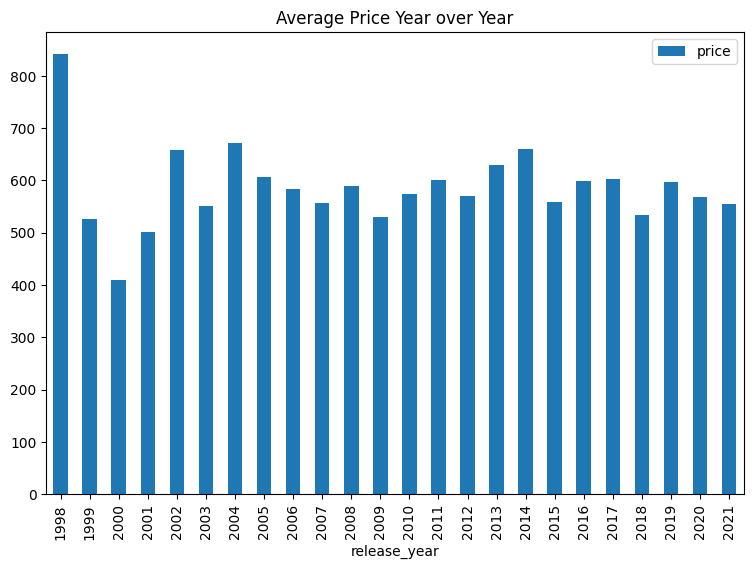

In [11]:
import plotly.express as px

price_avg = df.loc[:, ['price','release_year']]

price_avg = price_avg.groupby('release_year',as_index=False)['price'].mean()

price_avg.plot(kind='bar',
               x='release_year',
               y='price',
               title='Average Price Year over Year',
               figsize=(9,6)
              )

**What is the distribution of audiobooks released YoY? Trends?**

There is a steady upward trend, which makes sense. However, the 2021 dramatic spike seems odd.

<Axes: title={'center': 'Distribution of Audiobook Releases Year over Year'}, ylabel='Frequency'>

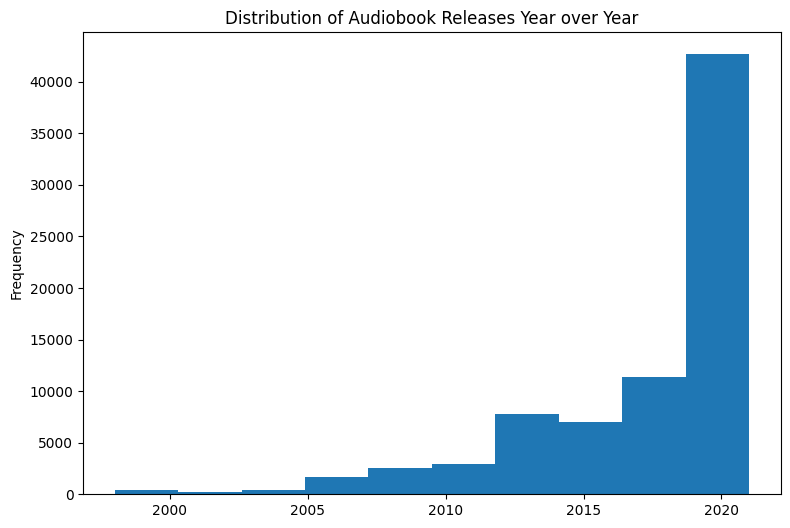

In [12]:
df['release_year'].plot(kind='hist',
        title='Distribution of Audiobook Releases Year over Year',
        figsize=(9,6)
        )

**Are there trends in rating_quantity mean YoY?**

There is a big caveat with rating_stars and rating_quantity: **only 24% of books are rated (rated zero)**. For reasons unknown

If we are looking at the total descriptive statistics for this (including 0s) it will shift the mean/median and is good to be aware for the sum.

**Next are the descriptive statistics for ratings_quantity with vs without zeros**

In [13]:
ratings_quantity = df[['rating_quantity']]
ratings_quantity_no_zero = ratings_quantity[ratings_quantity['rating_quantity'] > 0]

In [14]:
ratings_quantity.describe()

,rating_quantity
count,77082.000000
mean,4.215835
std,92.141777
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,12573.000000


In [15]:
ratings_quantity_no_zero.describe()

,rating_quantity
count,14847.000000
mean,21.887587
std,209.031440
min,1.000000
25%,1.000000
50%,2.000000
75%,7.000000
max,12573.000000


**Next, I will provide a chart of the proportion of zeros in rating_quantity by year**

<Axes: xlabel='release_year'>

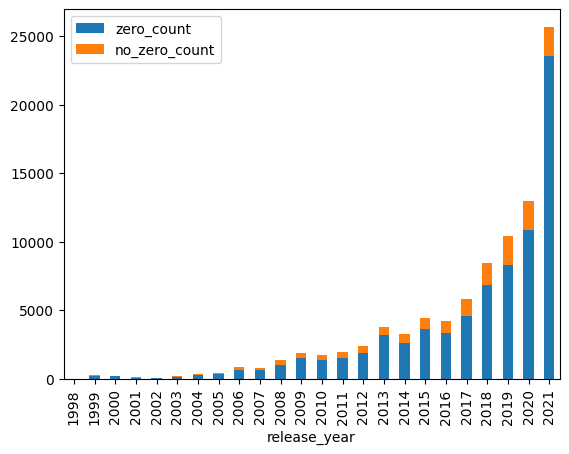

In [16]:
import plotly.graph_objs as go


def calculate_rating_zero_counts():  
      
          ratings_quantity_count = df[['rating_quantity','release_year']]
          ratings_quantity_count_no_zero = ratings_quantity_count[ratings_quantity_count['rating_quantity'] > 0]
                        

                            
          ratings_quantity_count_no_zero = (ratings_quantity_count_no_zero['release_year']
                                                   .value_counts()
                                                   .reset_index()
                                                   .rename(columns={'count':'no_zero_count'}))
                            
          ratings_quantity_count = (ratings_quantity_count['release_year']
                                                    .value_counts()
                                                    .reset_index()
                                                    .rename(columns={'count':'zero_count'}))
                            

          return ratings_quantity_count, ratings_quantity_count_no_zero
    
ratings_quantity_count, ratings_quantity_count_no_zero = calculate_rating_zero_counts()

ratings_zero = pd.merge(
                      ratings_quantity_count,
                      ratings_quantity_count_no_zero,
                      on='release_year').fillna(0)

ratings_zero = ratings_zero.set_index('release_year').sort_values(by='release_year')

ratings_zero.plot.bar(stacked=True)


**Next, are some charts for the Sum/Mean/Median of rating_quantity by year**

* On the "Sum by Year" chart below, there is a ***large decrease*** in 2021. This is due to a ***large increase*** in the chart above in unrated (zero) audiobooks, which brings the mean down.
* On the "Mean/Median of the Year" chart below, The outlier (1998) has only 3 books, but have high quantities of reviews.

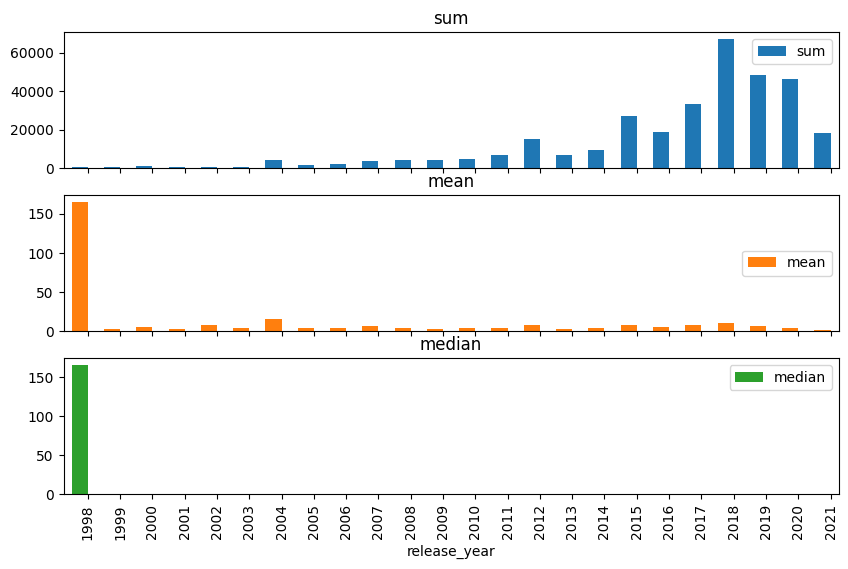

In [17]:

ratings_quantity_year = df[['rating_quantity','release_year']]

rating_quantity_desc = ratings_quantity_year.groupby('release_year',as_index=False)['rating_quantity'].agg(['sum','mean','median'])

axes = rating_quantity_desc.plot.bar(x='release_year',subplots=True,position=1,title=['sum','mean','median'],figsize=(10,6))

axes[1].legend(loc=5)

# Pricing:

Is there a correlation betwen stars and price? 

What percent are free and not free?

# Ratings:

What is the ***overall*** distribution of the rating_quantity?

0-4 is an extreme (low) outlier at 72.242k, with the subsequent (5-9) at only 1.8k

12.56k-12.59k is an extreme (high) outlier and only one book with that quantity

<Axes: title={'center': 'Distribution of Rating Quantity'}, ylabel='Frequency'>

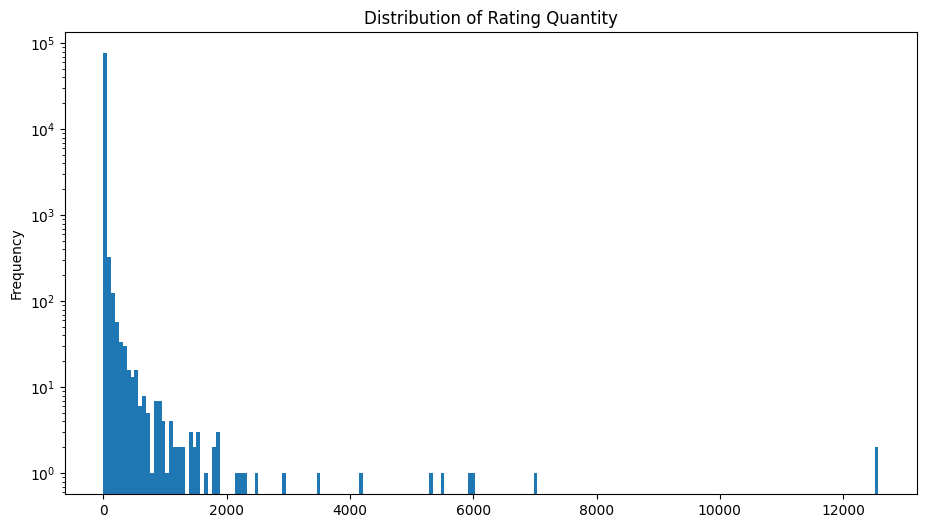

In [18]:
df['rating_quantity'].plot(kind='hist',
        title='Distribution of Rating Quantity',
        figsize=(11,6),
        logy=True,
        bins=200                  
        )

What is the **overall** distribution of rating stars?

Following the high level of zeros in rating_quantity, we see the same in rating_stars

To better highlight the other ratings, I am going to exclude 0

It seems that when users rate, they rate highly- with the vast majority between 4 and 5

<Axes: title={'center': 'Distribution of Rating Stars'}, ylabel='Frequency'>

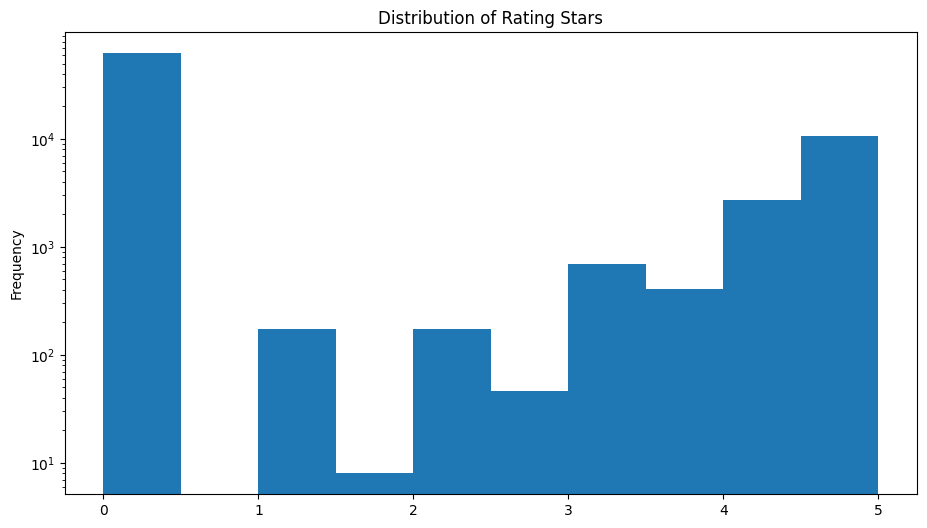

In [19]:
df['rating_stars'].plot(kind='hist',
        title='Distribution of Rating Stars',
        figsize=(11,6),
        logy=True,
        bins=10
        )

# Narrator:

Which narrator has narrated the most? and what is the distribution like?

For the distribution, narrating once is an extreme outlier at 19.11k, after that, the majority is less than 50

In [20]:
df_narrator = df['narrator'].value_counts().reset_index().rename(columns={'count':'narrator_count'})

df_narrator.head(10)

,narrator,narrator_count
0,"矢島雅弘,石橋遊",874
1,Intuitive,465
2,uncredited,326
3,"中西貴之,BJ",311
4,BookBuddyDigitalMedia,259
5,ДмитрийЕвстратов,221
6,BillBrown,198
7,div.,197
8,SeanPratt,173
9,TomParks,160


<Axes: title={'center': 'Distribution of Narrator Count'}, ylabel='Frequency'>

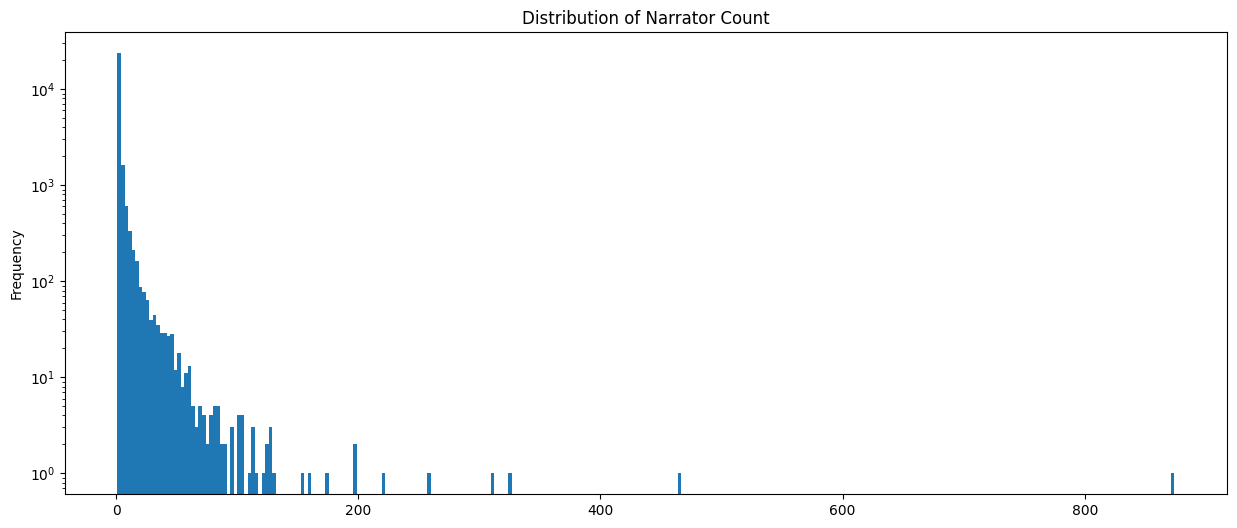

In [21]:
 df_narrator['narrator_count'].plot(kind='hist',
         title='Distribution of Narrator Count',
         figsize=(15,6),
         logy=True,
         bins =300                           
         )

What is the distribution of narration time?

The vast majority are very short


In [22]:
narration_time = df['time'].value_counts().reset_index().rename(columns={'count':'time_count'})

narration_time.head(10)

,time,time_count
0,60,408
1,360,368
2,300,361
3,420,347
4,480,320
5,1080,315
6,240,303
7,1020,300
8,600,289
9,1200,258


<Axes: title={'center': 'Distribution of Narration Time'}, ylabel='Frequency'>

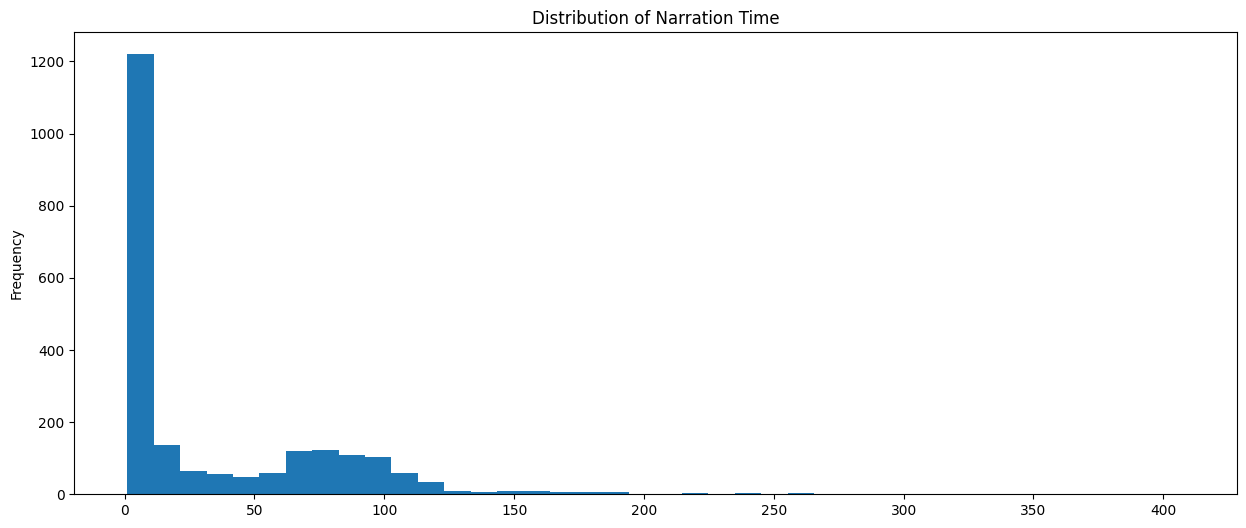

In [23]:
 narration_time['time_count'].plot(kind='hist',
         title='Distribution of Narration Time',
         figsize=(15,6),
         bins=40                          
         )


# Author:

How many authors have narrated their own book?

In [24]:
self_narration = len(df.loc[df['author'] == df['narrator']])

print(f'{self_narration} authors have narrated their own book')

11293 authors have narrated their own book


Which author has written the longest narration?

In [25]:
longest_narration = df[['author','time']].sort_values(by='time',ascending=False)

longest_narration.head(10)

,author,time
51330,T.W.Brown,8595
38010,EdwardGibbon,7591
5473,鈴木三重吉,7363
33756,ScottC.Litin,6711
48551,"JaneAusten,CharlesDickens,LouisaMayAlcott,",6139
66019,ChristopherGlyn,5913
58581,"NapoleonHill,GeorgeSamuelClason,JamesAllen,",5701
47246,MattLarkin,5560
69600,SikhNet,5545
48278,"RobertLouisStevenson,JackLondon,CharlesDickens,",5264
